In [1]:
import numpy as np
import pandas as pd

from pyextremes import (
    __version__,
    EVA,
    plot_mean_residual_life,
    plot_parameter_stability,
    plot_return_value_stability,
    plot_threshold_stability,
)
print("pyextremes", __version__)

pyextremes 2.2.3


# Load Data

In [2]:
data = pd.read_csv(
    "../../../data/battery_wl.csv",
    index_col=0,
    parse_dates=True,
    squeeze=True,
)
data = (
    data
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
    .loc[pd.to_datetime("1925"):]
)
data = data - (data.index.array - pd.to_datetime("1992")) / pd.to_timedelta("365.2425D") * 2.87e-3

# Mean Residual Life Plot

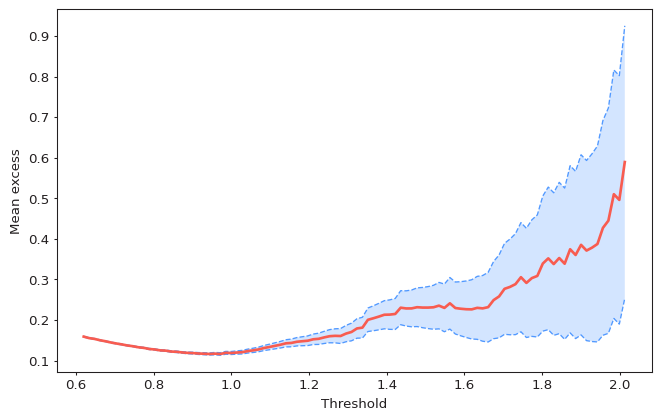

In [3]:
ax = plot_mean_residual_life(data)
fig = ax.get_figure()
fig.savefig("mean-residual-life-high.png", dpi=96, bbox_inches="tight")

# Parameter Stability Plot

calculating stability parameters: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.12it/s]


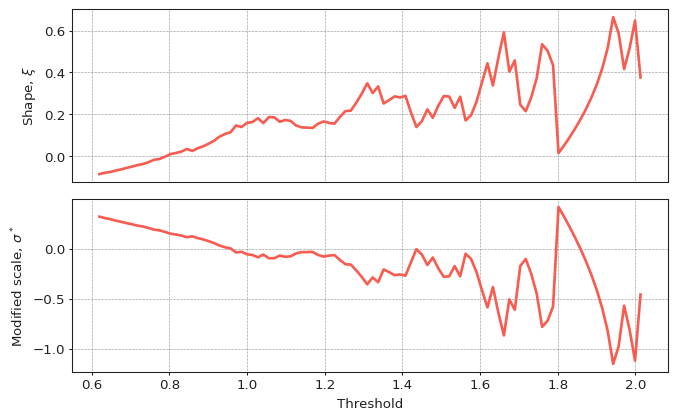

In [4]:
ax_shape, ax_scale = plot_parameter_stability(data, alpha=None, progress=True)
fig = ax_shape.get_figure()
fig.savefig("parameter-stability.png", dpi=96, bbox_inches="tight")

# Return Value Stability Plot

calculating return values: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.45it/s]


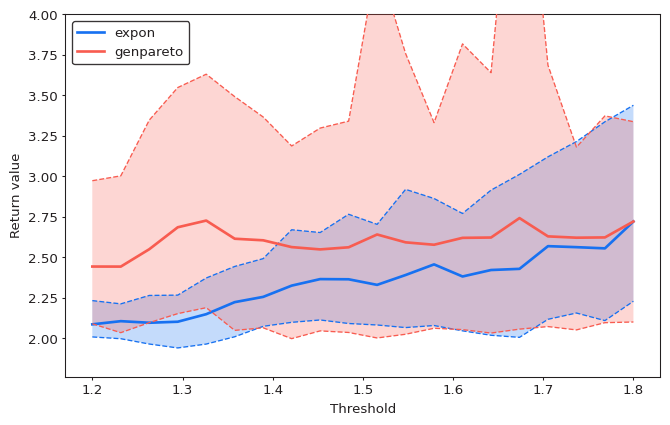

In [5]:
ax = plot_return_value_stability(data, return_period=100, thresholds=np.linspace(1.2, 1.8, 20), alpha=0.95, n_samples=100, progress=True)
ax.set_ylim(ax.get_ylim()[0], 4)
fig = ax.get_figure()
fig.savefig("return-value-stability.png", dpi=96, bbox_inches="tight")

# Plot Threshold Stability

calculating return values: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 29.90it/s]


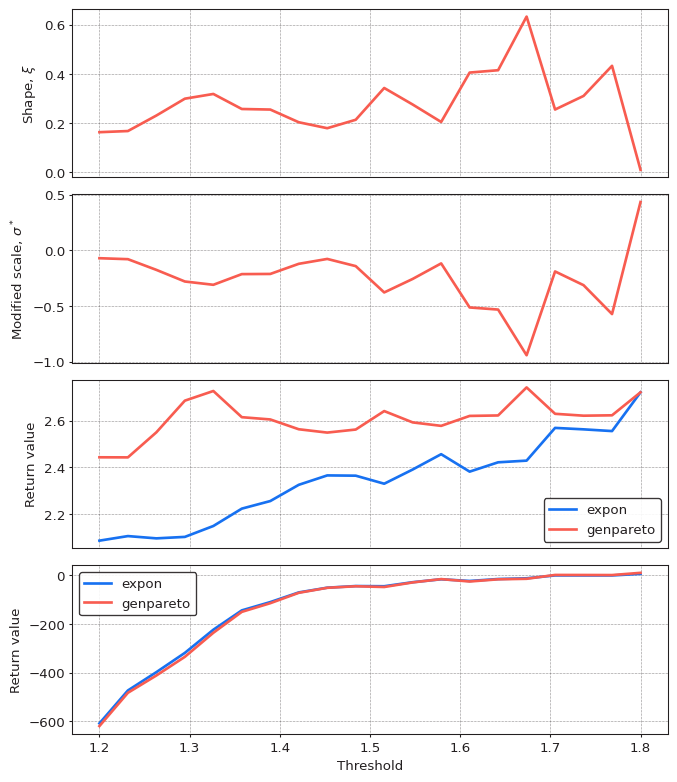

In [6]:
axes = plot_threshold_stability(data, return_period=100, thresholds=np.linspace(1.2, 1.8, 20), progress=True)
fig = axes[0].get_figure()
fig.savefig("threshold-stability.png", dpi=96, bbox_inches="tight")

# Use Selected Threshold

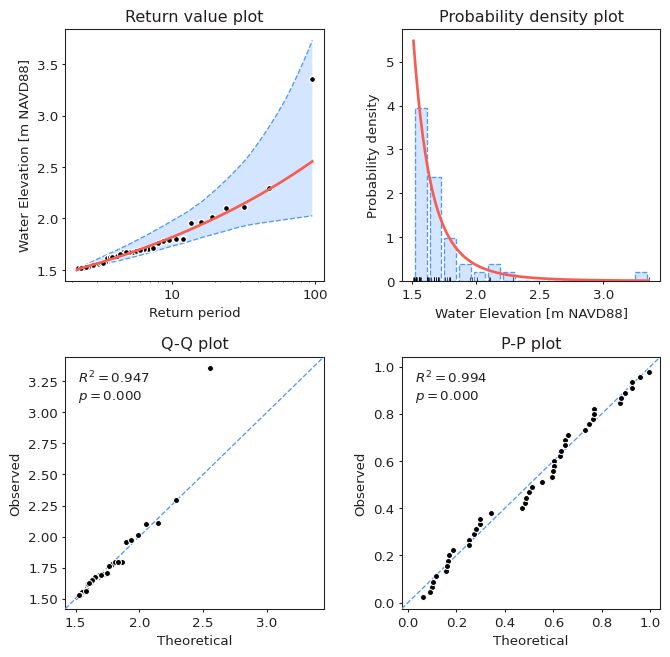

In [7]:
model = EVA(data)
model.get_extremes("POT", threshold=1.5)
model.fit_model()
fig, ax = model.plot_diagnostic(alpha=0.95)
fig.savefig("selected-threshold-diagnostic.png", dpi=96, bbox_inches="tight")